In [ ]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#  load Dataset
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
# display first 5 rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# check dataset shape and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# check  missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
# cleaning and processing
#deleting card id if its not usefull
df.drop('car_ID', axis=1, inplace=True)

In [ ]:
# extract car brand from Carname
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

In [ ]:
# fix typos in brand names
df['CarBrand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'nissan': 'nissan',
    'maxda': 'mazda'
}, inplace=True)

<ipython-input-10-3673109730>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarBrand'].replace({


In [ ]:
print(df.columns)


Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarBrand'],
      dtype='object')


In [ ]:
# encode categorical features
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols.tolist())

Categorical Columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']


In [ ]:
# One-hotencode=  means categorial text cinverts into numerical form
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
# split into features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [ ]:
# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(" Preprocessing complete! Data is ready for model training.")

 Preprocessing complete! Data is ready for model training.


In [ ]:
# training data using regularization technique
#Linear Regression (baseline)
#Ridge Regression (L2 regularization)
#Lasso Regression (L1 regularization)
#ElasticNet (combined L1 + L2)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# initialize models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5)
}

In [ ]:
#train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n {name} Regression:")
    print(f"   R square Score: {r2:.4f}")
    print(f"   RMSE: {rmse:.2f}")


 Linear Regression:
   R square Score: 0.6727
   RMSE: 5083.50

 Ridge Regression:
   R square Score: 0.8308
   RMSE: 3654.35

 Lasso Regression:
   R square Score: 0.7107
   RMSE: 4779.26

 ElasticNet Regression:
   R square Score: 0.8303
   RMSE: 3659.99


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.448e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.487e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


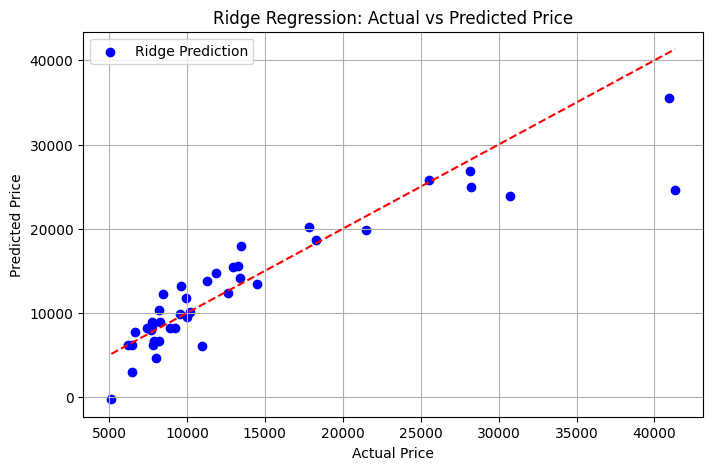

In [ ]:
# plottig graph true vs predicted value
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, models['Ridge'].predict(X_test), color='blue', label='Ridge Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression: Actual vs Predicted Price')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-21-1818151924>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lasso_importance.head(15), x='Coefficient', y='Feature', palette='viridis')


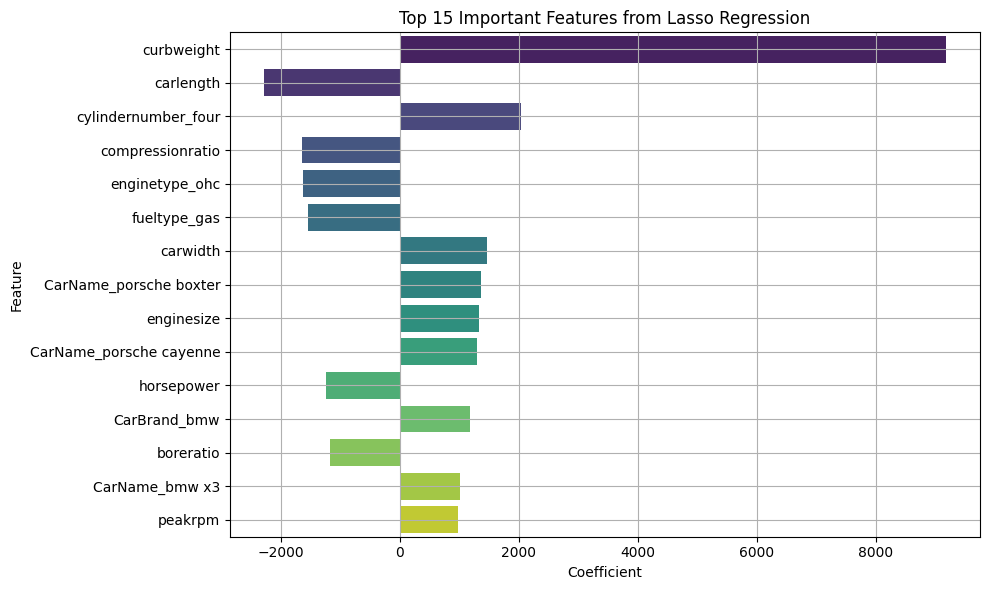

In [ ]:
# feature importance from lasso Regression its great for feature selection
lasso_model = models['Lasso']
feature_names = X.columns
coefficients = lasso_model.coef_

# create a DataFrame for visualization
lasso_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# plot Top 15 Features
plt.figure(figsize=(10, 6))
sns.barplot(data=lasso_importance.head(15), x='Coefficient', y='Feature', palette='viridis')
plt.title('Top 15 Important Features from Lasso Regression')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# save actual vs predicted results
# get predictions from  ridge model
best_model = models['Ridge']
y_pred = best_model.predict(X_test)

# create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# save to CSV
results_df.to_csv('ridge_predictions.csv', index=False)
print(" Actual vs Predicted saved to ridge_predictions.csv")


 Actual vs Predicted saved to ridge_predictions.csv


In [ ]:
# Save Model Coefficients to CSV
# get coefficients from the model
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': models['Ridge'].coef_
})

# save to CSV
coefs.to_csv('ridge_coefficients.csv', index=False)
print(" Ridge model coefficients saved to ridge_coefficients.csv")


 Ridge model coefficients saved to ridge_coefficients.csv


In [ ]:
summary_data = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    summary_data.append([name, r2, rmse])

summary_df = pd.DataFrame(summary_data, columns=['Model', 'R2_Score', 'RMSE'])
summary_df.to_csv('model_performance_summary.csv', index=False)
print(" Model performance summary saved to model_performance_summary.csv")


 Model performance summary saved to model_performance_summary.csv


In [ ]:
# generating zip file for all csv file\

import pandas as pd
import numpy as np
import zipfile
import os
from sklearn.metrics import r2_score, mean_squared_error

#  Save Actual vs Predicted
y_pred = models['Ridge'].predict(X_test)
results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})
results_df.to_csv('ridge_predictions.csv', index=False)

#  save Coefficients
coefs_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': models['Ridge'].coef_
})
coefs_df.to_csv('ridge_coefficients.csv', index=False)

#  save Model Performance Summary
summary_data = []
for name, model in models.items():
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    summary_data.append([name, r2, rmse])

summary_df = pd.DataFrame(summary_data, columns=['Model', 'R2_Score', 'RMSE'])
summary_df.to_csv('model_performance_summary.csv', index=False)

#  create ZIP archive
with zipfile.ZipFile("car_price_model_outputs.zip", "w") as zipf:
    zipf.write("ridge_predictions.csv")
    zipf.write("ridge_coefficients.csv")
    zipf.write("model_performance_summary.csv")

print("All CSVs zipped into 'car_price_model_outputs.zip'")


All CSVs zipped into 'car_price_model_outputs.zip'
